In [1]:
import pickle

In [2]:
model = pickle.load(open('greatest_tree.pkl','rb'))

In [3]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
unseen_contract = [0, 2, 3,1,100,1]

In [9]:
model.predict([unseen_contract])

array([1])

## EXERCISE

In [10]:
import pandas as pd

In [11]:
clients = pd.read_sas('./data/anagrf_srs_an.sas7bdat', encoding='utf8')

In [12]:
clients.head()

,SEX,TIPO_FINZ_GARN,DAT_NSC,Klient_ID
0,M,1,1980-12-21,K_000001
1,Z,1,1986-12-29,K_000002
2,Z,2,1968-01-27,K_000003
3,Z,1,1982-10-22,K_000004
4,M,1,1984-10-19,K_000005


In [13]:
df = pd.read_sas('./data/rata_s_srs_an.sas7bdat', encoding='unicode_escape')

In [14]:
df.head()

,COD_PRDA_RATE,IMP_APL_FINZ,IMP_CPT_FINZ,NUM_RATE,IMP_RATE_MENS,IMP_MAX_UNPAIDINS,Contract_ID
0,M,950000.0,950000.0,24.0,41310.0,NaN,S_000001
1,M,50000.0,50000.0,12.0,4611.0,NaN,S_000003
2,M,100000.0,100000.0,42.0,2960.0,0.0,S_000004
3,M,3600434.0,2324160.0,49.0,48420.0,60143.0,S_000005
4,M,211776.0,211776.0,85.0,2930.0,1256.0,S_000006


## Task
- Create a model using variables in `rata_s`, to predict whether `IMP_MAX_UNPAIDINS` is 0 or positive.
- **Model:** RandomForestClassifier, (`from sklearn.ensemble import RandomForestClassifier`).
- Do grid search on `n_estimators` and `max_depth`.


In [15]:
df.fillna(0, inplace=True)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
import numpy as np

In [23]:
X = df.iloc[:,1:4]

In [24]:
y = np.where(df['IMP_MAX_UNPAIDINS']>0, 1, 0)

In [25]:
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
rf.feature_importances_

array([0.14458828, 0.44114605, 0.41426567])

## Feature importances: proxy for interpretability

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

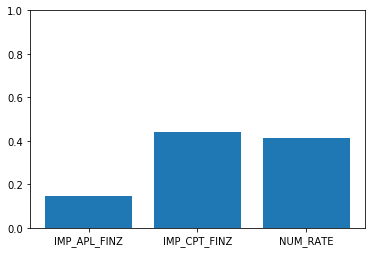

In [34]:
plt.bar(x=X.columns.values, height=rf.feature_importances_)
plt.ylim(0,1);

In [35]:
rf.predict_proba(X)

array([[0.93333333, 0.06666667],
       [0.81853577, 0.18146423],
       [0.69196612, 0.30803388],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

## statsmodels

In [36]:
import statsmodels.api as sm

In [37]:
logit = sm.Logit(y,X) # y \tilde X

In [38]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.621809
         Iterations 5


In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               269689
Model:                          Logit   Df Residuals:                   269686
Method:                           MLE   Df Model:                            2
Date:                Fri, 13 Dec 2019   Pseudo R-squ.:                -0.02358
Time:                        14:56:45   Log-Likelihood:            -1.6769e+05
converged:                       True   LL-Null:                   -1.6383e+05
                                        LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
IMP_APL_FINZ   4.78e-08   1.72e-08      2.783      0.005    1.41e-08    8.15e-08
IMP_CPT_FINZ  1.981e-07   1.68e-08     11.769      0.000    1.65e-07    2.31e-07
NUM_RATE        -0.0118   7.67e-05   -153.484      0.000      -0.012      -0.012
================================================================================
"""

In [40]:
result.conf_int()

,0,1
IMP_APL_FINZ,1.413844e-08,8.146092e-08
IMP_CPT_FINZ,1.650963e-07,2.310751e-07
NUM_RATE,-1.191541e-02,-1.161493e-02


In [42]:
odds_ratio = np.exp(result.params)

In [43]:
odds_ratio

IMP_APL_FINZ    1.000000
IMP_CPT_FINZ    1.000000
NUM_RATE        0.988304
dtype: float64

In [57]:
df.iloc[1:4,2:4]

,IMP_CPT_FINZ,NUM_RATE
1,50000.0,12.0
2,100000.0,42.0
3,2324160.0,49.0


In [53]:
#df[['COD_PRDA_RATE']].set_index(df.index)

In [58]:
df.to_excel('my_table.xlsx', sheet_name='Important Summary')

In [60]:
df.head()

,COD_PRDA_RATE,IMP_APL_FINZ,IMP_CPT_FINZ,NUM_RATE,IMP_RATE_MENS,IMP_MAX_UNPAIDINS,Contract_ID
0,M,950000.0,950000.0,24.0,41310.0,0.0,S_000001
1,M,50000.0,50000.0,12.0,4611.0,0.0,S_000003
2,M,100000.0,100000.0,42.0,2960.0,0.0,S_000004
3,M,3600434.0,2324160.0,49.0,48420.0,60143.0,S_000005
4,M,211776.0,211776.0,85.0,2930.0,1256.0,S_000006


In [63]:
my_other_df = df.pivot_table(values='IMP_APL_FINZ', index='Contract_ID', columns='COD_PRDA_RATE').fillna(0)

In [64]:
my_other_df.to_excel('my_table.xlsx', sheet_name='Even More Important Summary')